In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 1

In [72]:
def generate_data(degree):
 x = np.sort(np.random.uniform(0,1,degree))
 noise = np.random.normal(0,0.05,degree)
 y = 0.5 + 0.4 * np.sin(2*np.pi*x) + noise

 xtest = np.sort(np.random.uniform(0,1,degree))
 noise = np.random.normal(0,0.05,degree)
 ytest = 0.5 + 0.4 * np.sin(2*np.pi*xtest) + noise
 return x,y,xtest,ytest

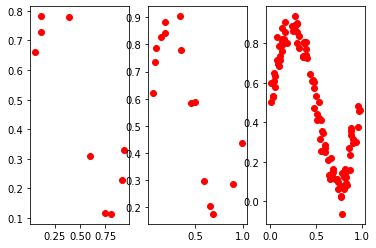

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
#9
x9,y9,xtest9,ytest9 = generate_data(9)
ax1.plot(x9,y9,'ro')
#15
x15,y15,xtest15,ytest15 = generate_data(15)
ax2.plot(x15,y15,'ro')
#100
x100,y100,xtest100,ytest100 = generate_data(100)
ax3.plot(x100,y100,'ro')

## 2

C:\Users\danie\AppData\Local\Temp/ipykernel_12804/2502300992.py:17: RankWarning: Polyfit may be poorly conditioned
  pols9,preds9,predstest9 = get_preds(x9,y9,xtest9,ax1)


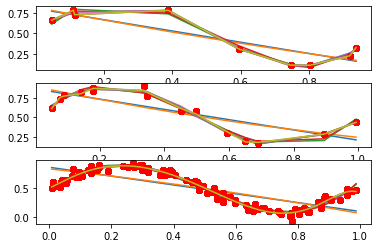

In [80]:
def get_preds(x,y,xtest,ax):
  pols= []
  preds = []
  predstest= []
  for degree in range(1, 10):
    pol = np.polyfit(x,y,degree)
    pred = np.polyval(pol, x)
    ax.plot(x,y,'ro')
    ax.plot(x,pred)
    pols.append(pol)
    preds.append(pred)

    predtest = np.polyval(pol, xtest)
    predstest.append(predtest)
  return pols,preds,predstest
fig, (ax1,ax2,ax3) = plt.subplots(3)
pols9,preds9,predstest9 = get_preds(x9,y9,xtest9,ax1)
pols15,preds15,predstest15 = get_preds(x15,y15,xtest15,ax2)
pols100,preds100,predstest100 = get_preds(x100,y100,xtest100,ax3)

## 3

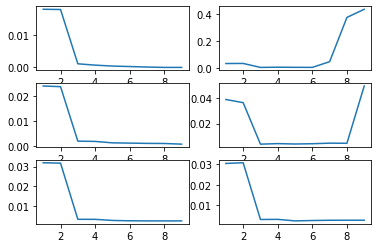

In [88]:
fig, axs = plt.subplots(3,2)
degrees = [1,2,3,4,5,6,7,8,9]
def get_mses(preds,predstest,y,ytest):
    mses = []
    msestest = []
    for pred, predtest in zip(preds, predstest):
        mse = np.mean((y - pred)**2)
        mses.append(mse)

        msetest = np.mean((ytest - predtest)**2)
        msestest.append(msetest)
    return mses, msestest

mses9, msestest9 = get_mses(preds9,predstest9,y9,ytest9)
mses15, msestest15 = get_mses(preds15,predstest15,y15,ytest15)
mses100, msestest100 = get_mses(preds100,predstest100,y100,ytest100)
axs[0,0].plot(degrees,mses9)
axs[0,1].plot(degrees,msestest9)
axs[1,0].plot(degrees,mses15)
axs[1,1].plot(degrees,msestest15)
axs[2,0].plot(degrees,mses100)
axs[2,1].plot(degrees,msestest100)

## 4

[[-0.34829339]]


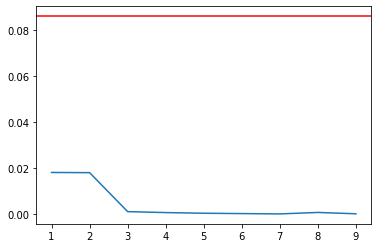

In [91]:
import sklearn 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import load_boston
from sklearn.metrics import explained_variance_score, mean_squared_error

fig, (ax1) = plt.subplots(1)
lambd = 0.0000000000001
degrees = [1,2,3,4,5,6,7,8,9]
mses = []
for pred, predtest,pol in zip(preds9, predstest9,pols9):
    mse = np.mean((y9 - pred)**2) + lambd * np.sum(pol**2)
    mses.append(mse)

ax1.plot(degrees,mses)

x_train= x9.reshape(-1, 1)
y_train= y9.reshape(-1, 1)

ridgereg= Ridge(alpha=1) 
ridgereg.fit(x_train,y_train)
yp = ridgereg.predict(x_train)
mse_ridge = np.mean((y9 - yp)**2) + lambd * np.sum(ridgereg.coef_**2)
ax1.axhline(y=mse_ridge, color='r', linestyle='-')
print(ridgereg.coef_)

## 5

C:\Users\danie\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


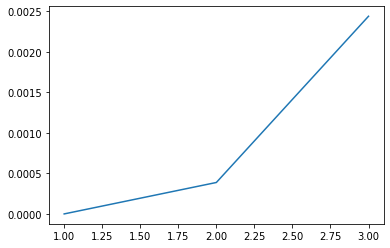

In [32]:
pol9 = np.polyfit(x9,y9,9)
pred9 = np.polyval(pol9, x9)
mse9 = np.mean((y9 - pred9)**2)

pol15 = np.polyfit(x15,y15,9)
pred15 = np.polyval(pol15, x15)
mse15 = np.mean((y15 - pred15)**2)

pol100 = np.polyfit(x100,y100,9)
pred100 = np.polyval(pol100, x100)
mse100 = np.mean((y100 - pred100)**2)

plt.plot([1,2,3],[mse9,mse15,mse100])

# Question 2

# 2.1 
For the n-th dimension, there are going to be 2^n vertexes. The intuition is that for each point in the (n-1) dimension to convert it into the n-th dimension, we need to create two points by appening a 0 and a 1 (exponential growth). Let's take (1,0) as an example:
* (1,0) => (1,0,1) and (1,0,0)

In the following code block, there is a function that generates the vertex taking into account the dimension:

In [5]:
def get_vertices(dimension) : 
    assert dimension >= 1

    # base case
    if dimension == 1:
        return [[0], [1]]
    
    current = get_vertices(dimension-1)

    result = []

    for coords in current:
        for  i in [0, 1]:
            result.append([*coords, i])

    return result

# example
twoD_points = get_vertices(2)
threeD_points = get_vertices(3)

assert len(twoD_points) == 4
assert len(threeD_points) == 8

print(twoD_points)
print(threeD_points)


[[0, 0], [0, 1], [1, 0], [1, 1]]
[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]


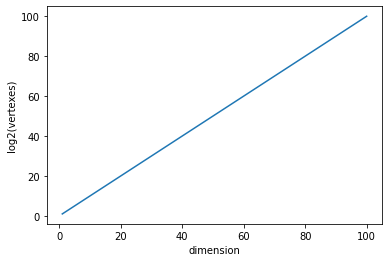

In [7]:
def nrPoints(n):
    return n


x = np.array(range(100)) + 1
y = nrPoints(x)
plt.plot(x,y)
plt.ylabel('log2(vertexes)')
plt.xlabel('dimension')
plt.show()

# 2.2 

For the n-th dimension there the diagonal is going to be sqrt(n). For example: 
In two dimension we can use the pythagoras diagram and get sqrt(1 + 1)
In 3d we use the previous diagonal and 1 (new dimension) so we get sqrt(sqrt(2)^2 + 1) so we get sqrt(3)
for the n dimension we do sqrt( sqrt(n-1)^2 + 1) <=> sqrt(n-1+1) <=> sqrt(n)


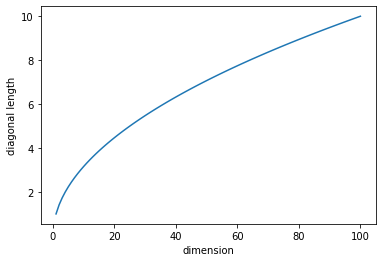

In [9]:
def diagonal(n):
    return np.sqrt(n)


x = np.array(range(100)) + 1
y = diagonal(x)
plt.plot(x,y)
plt.ylabel('diagonal length')
plt.xlabel('dimension')
plt.show()


# 2.3

For this question, we used the recurrence formula to calculate the volume that can be found in
https://en.wikipedia.org/wiki/N-sphere. For each dimension we plotted two charts that compare the use of the formula and the approximation taking into account the percentage of points that are inside the sphere

In [10]:
import math

# calculates the distance between two points (using vectorization)
def distance(p , q):    
    assert len(p) == len(q) # the points must have the same dimension
    return math.sqrt(np.sum((p-q)**2))

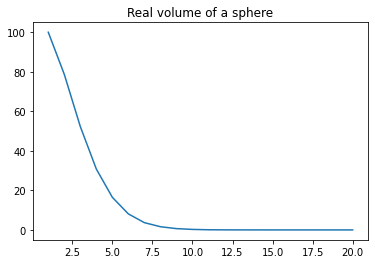

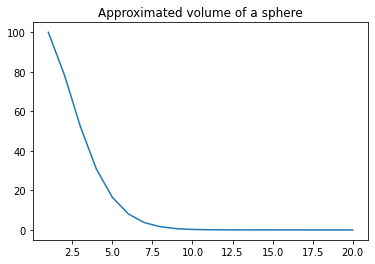

In [12]:
def get_volume(dim): #using the recurrence formula
    vol = [0] * dim
    vol[0] = 2 * 0.5
    vol[1] = math.pi * 0.5**2

    for i in range(2, dim):
        vol[i] = vol[i-2] * 2 * math.pi/(i+1) * 0.5**2

    return vol



dimensions = np.array(range(20)) + 1
nr_points = 100000

x = []
y = []
y_real = np.multiply(get_volume(20) ,100) # to get the percentage



for dimension in dimensions:
    x.append(dimension)
    n = np.random.uniform(0, 1, size= (nr_points,dimension))
    center =  [0.5] * dimension # center of the sphere

    counter = 0
    for i in range(nr_points):
        if distance(n[i], center) <= 0.5: # inside the sphere
            counter += 1
    
    y.append(counter/nr_points * 100)

# approximation
plt.plot(x,y)
plt.title('Real volume of a sphere')
plt.show()

#real
plt.plot(x, y_real)
plt.title('Approximated volume of a sphere')
plt.show()

# 2.4


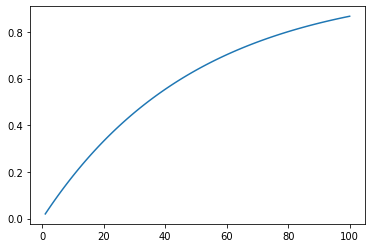

In [13]:
def skin(n):
    return 1 - np.power(1 - 2*0.01,n)


x = np.array(range(100)) + 1
y = skin(x)
#print(y)
plt.plot(x,y)
plt.show()

# 2.5

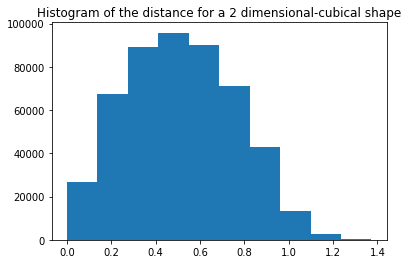

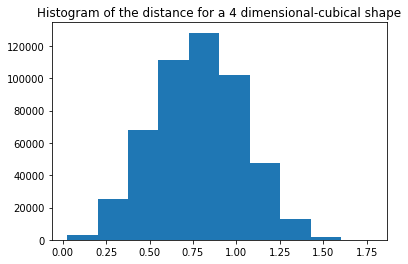

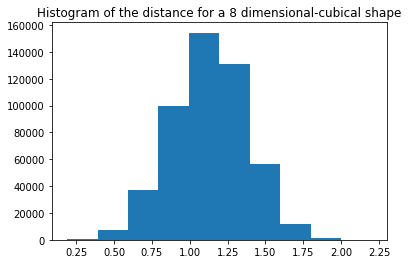

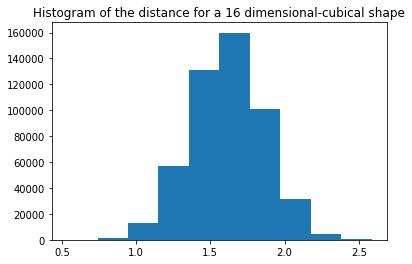

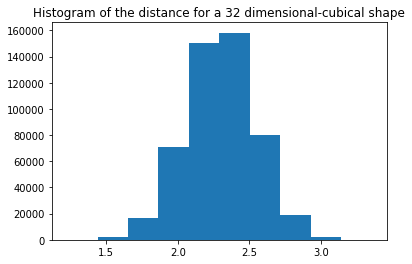

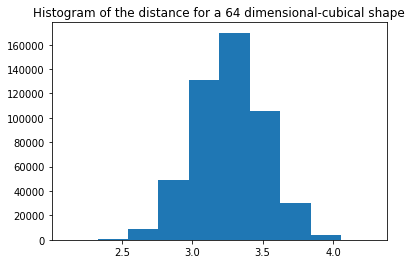

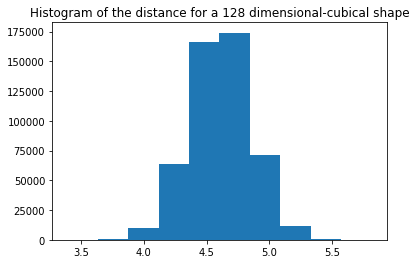

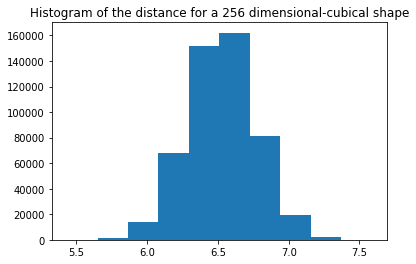

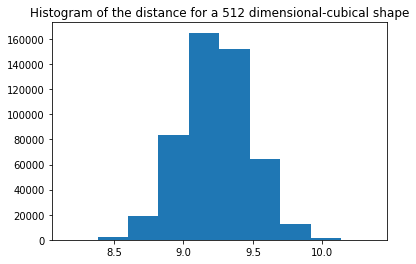

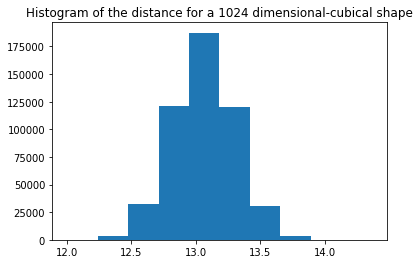

In [14]:
current_dimension = 2
nr_points = 1000
from collections import defaultdict

while current_dimension <= 1024:
    c = 0

    counter = defaultdict(int)
    points = np.random.uniform(0, 1, size= (nr_points,current_dimension))
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            dist = distance(points[i], points[j])
            counter[dist] += 1

    plt.hist(counter)
    plt.title('Histogram of the distance for a ' + str(current_dimension) + ' dimensional-cubical shape')
    plt.show()
    current_dimension = current_dimension * 2